# Training

In [1]:
import numpy as np
import math

import matplotlib.pyplot as plt

In [2]:
from plot import plot_decision_boundary, plot_decision_boundary_categorical, plot_nn_history, draw_nn
from utils import standard_scaler, train_test_split, to_categorical, make_blobs
from nn import NeuralNetwork, LayerDense

<h1> Training MLP on Blobs</h1>

<h2>Binary Classification: Output Sigmoid (2 classes) </h2>

X_train shape: (210, 2)
y_train shape: (210,)
X_test shape: (90, 2)
y_test shape: (90,)


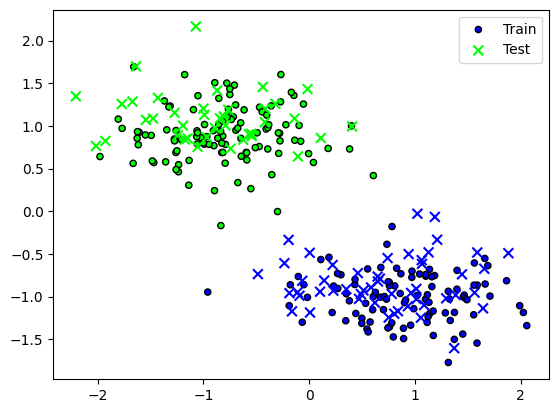

In [3]:
n_features = 2
n_classes = 2
n_samples= 300
cluster_std = 2


X, y = make_blobs(n_samples=n_samples, n_features=n_features, centers=n_classes, cluster_std=cluster_std, random_state=51)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

X_train = standard_scaler(X_train)
X_test = standard_scaler(X_test)

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.brg, edgecolor='k', s=20, label='Train')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.brg, marker='x', s=50, label='Test')

plt.legend()

print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

In [4]:
mlp_2 = NeuralNetwork(loss=NeuralNetwork.loss_mse)

mlp_2.add(LayerDense(2, 4, LayerDense.relu))
mlp_2.add(LayerDense(4, 1, LayerDense.sigmoid))

Total iterations 210
Iterations of each epoch 21
Validation set size: 21
Training set size: 189
Evaluation set size: 189
Validation set size: 21
Epoch: 1/10 | loss 0.2251521230881172 | accuracy 0.7248677248677249 | validation loss 0.22433501827745636 | validation accuracy 0.8095238095238095
Evaluation set size: 189
Validation set size: 21
Epoch: 2/10 | loss 0.11364543904615741 | accuracy 0.9947089947089947 | validation loss 0.10661211061300234 | validation accuracy 1.0
Evaluation set size: 189
Validation set size: 21
Epoch: 3/10 | loss 0.05676753932796242 | accuracy 0.9947089947089947 | validation loss 0.05049692299206294 | validation accuracy 1.0
Evaluation set size: 189
Validation set size: 21
Epoch: 4/10 | loss 0.03305166876215033 | accuracy 1.0 | validation loss 0.028311461443656878 | validation accuracy 1.0
Evaluation set size: 189
Validation set size: 21
Epoch: 5/10 | loss 0.02201836232482567 | accuracy 1.0 | validation loss 0.018272715846182667 | validation accuracy 1.0
Evaluati

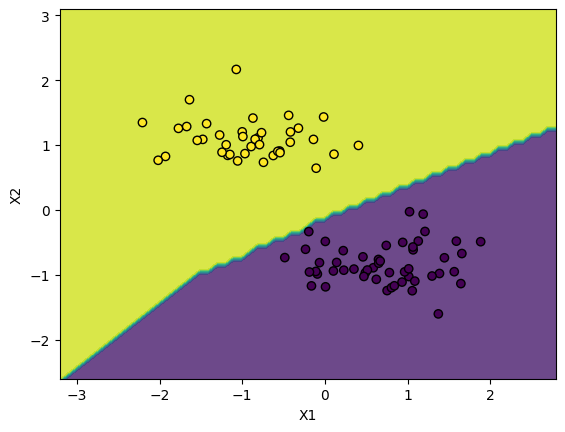

In [ ]:
reshaped_y_true = y_train.reshape(-1, 1)  # [1, 0, 0, 0] -> [[1], [0], [0], [0]] | since here we have outputs from 

mlp_2.fit(X_train, reshaped_y_true, 0.3, 10, 10)

plot_decision_boundary(mlp_2, X_test, y_test.reshape(-1, 1))

In [10]:
test_loss, test_acc = mlp_2.evaluate(X_test, y_test.reshape(-1, 1))
print(f'Test loss: {test_loss}')
print(f'Test accuracy: {test_acc}')

Test loss: 0.010366942778275825
Test accuracy: 1.0


<h2>Multiclass Classification: Output Softmax (n classes) </h2>

X_train shape: (140, 2)
y_train shape: (140, 4)
X_test shape: (34, 2)
y_test shape: (34, 4)


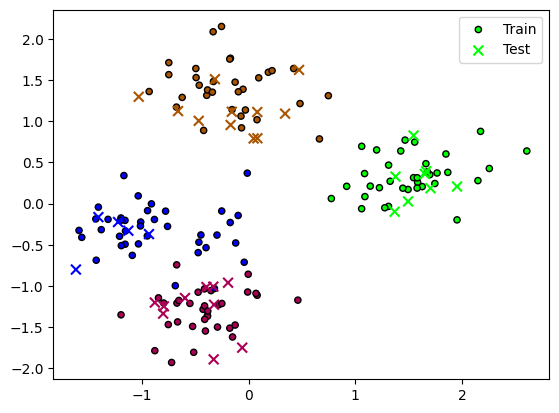

In [11]:
n_dimensions = 2
n_classes = 4
n_samples= 174
cluster_std = 1.4

X, y = make_blobs(n_samples=n_samples, n_features=n_dimensions, centers=n_classes, cluster_std=cluster_std, random_state=91)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = standard_scaler(X_train)
X_test = standard_scaler(X_test)

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.brg, edgecolor='k', s=20, label='Train')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.brg, marker='x', s=50, label='Test')
plt.legend()


y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

In [110]:
np.random.seed(0)

mlp_n_class = NeuralNetwork(loss=NeuralNetwork.loss_categorical_crossentropy, log=True)

mlp_n_class.add(LayerDense(n_dimensions, 16, LayerDense.relu))
mlp_n_class.add(LayerDense(16, 8, LayerDense.relu))
mlp_n_class.add(LayerDense(8, n_classes, LayerDense.softmax))

Total iterations 180
Iterations of each epoch 18
Validation set size: 14
Training set size: 126
Evaluation set size: 126
Validation set size: 14
Epoch: 1/10 | loss 1.9124276411608807 | accuracy 0.07142857142857142 | validation loss 1.8635346481231088 | validation accuracy 0.07142857142857142
Evaluation set size: 126
Validation set size: 14
Epoch: 2/10 | loss 1.1701264148727366 | accuracy 0.5079365079365079 | validation loss 1.152784006459147 | validation accuracy 0.5714285714285714
Evaluation set size: 126
Validation set size: 14
Epoch: 3/10 | loss 0.8484539799154546 | accuracy 0.6428571428571429 | validation loss 0.8279605300100333 | validation accuracy 0.6428571428571429
Evaluation set size: 126
Validation set size: 14
Epoch: 4/10 | loss 0.6676185846083423 | accuracy 0.8095238095238095 | validation loss 0.6383641704638084 | validation accuracy 0.7142857142857143
Evaluation set size: 126
Validation set size: 14
Epoch: 5/10 | loss 0.5433816647086723 | accuracy 0.8809523809523809 | vali

c:\Users\ferra\Desktop\NeuralNets\scratch-mlp\plot.py:45: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[np.argmax(y, axis=1) == cl, 0],


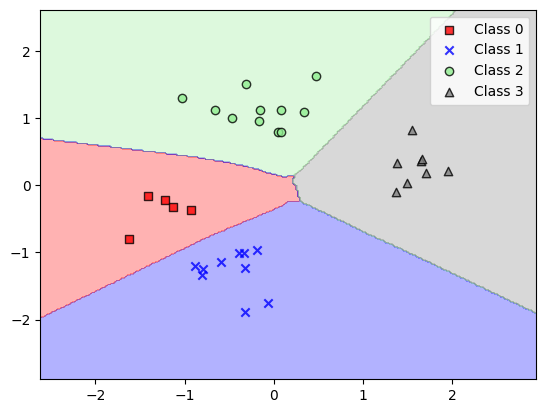

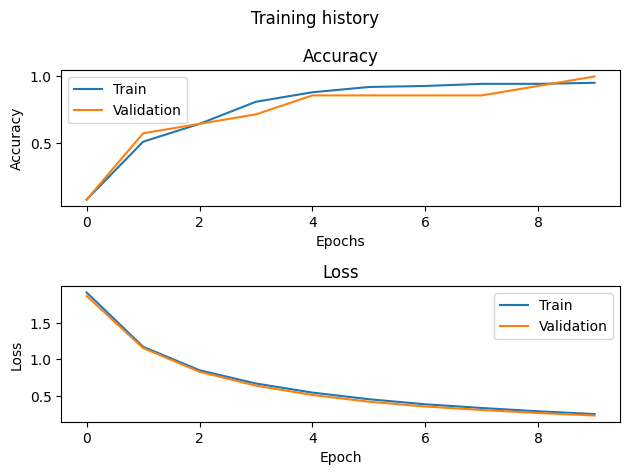

In [135]:
mlp_n_class.fit(X_train, y_train, learning_rate=0.03, epochs=10, batch_size=8)

plot_decision_boundary_categorical(mlp_n_class, X_test, y_test, 0.02)
plot_nn_history(mlp_n_class)

In [136]:
test_loss, test_acc = mlp_n_class.evaluate(X_test, y_test)
print(f'Test loss: {test_loss}')
print(f'Test accuracy: {test_acc}')

Test loss: 0.14068072588552347
Test accuracy: 1.0


# Layers visualization

In [137]:
from nn_extractor import NeuralNetworkExtractor

mlp_n_class_nne = NeuralNetworkExtractor(mlp_n_class)

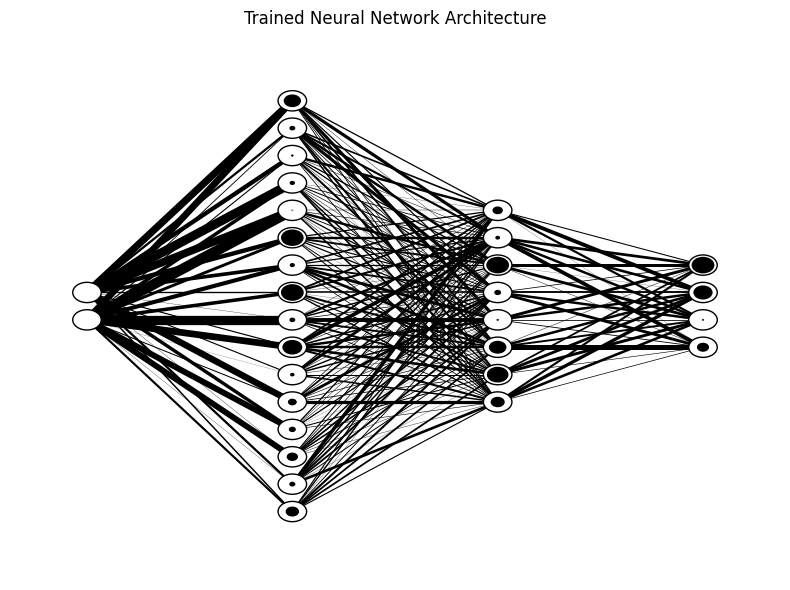

In [139]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.title('Trained Neural Network Architecture')

draw_nn(
    plt.gca(), 
    .1, .9, .1, .9, 
    mlp_n_class_nne.get_neurons(),
    mlp_n_class_nne.get_weights(),
    mlp_n_class_nne.get_biases()
)
plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
mlp_n_class_nne.get_biases()

[array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]]),
 array([[0., 0., 0., 0., 0., 0., 0., 0.]]),
 array([[0., 0., 0., 0.]])]

<h1> Training on MNIST </h1>

In [14]:
from tensorflow.keras.datasets import mnist

In [15]:
# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# partition = 1

# train_images = train_images[:int(len(train_images) * partition)]
# train_labels = train_labels[:int(len(train_labels) * partition)]

# test_images = test_images[:int(len(test_images) * partition)]
# test_labels = test_labels[:int(len(test_labels) * partition)]

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Converts 0-255 values to 0-1
train_images = train_images / 255.0
test_images = test_images / 255.0


print(f'Train images shape: {train_images.shape}')
print(f'Train labels shape: {train_labels.shape}')
print(f'Test images shape: {test_images.shape}')
print(f'Test labels shape: {test_labels.shape}')

Train images shape: (60000, 28, 28)
Train labels shape: (60000, 10)
Test images shape: (10000, 28, 28)
Test labels shape: (10000, 10)


# Building NN 

In [16]:
np.random.seed(0)

mlp_mnist = NeuralNetwork(loss=NeuralNetwork.loss_categorical_crossentropy)

mlp_mnist.add(LayerDense(784, 128, LayerDense.relu)) # first layer with 128 neurons and input shape of 784 (28x28)
mlp_mnist.add(LayerDense(128, 32, LayerDense.relu))
mlp_mnist.add(LayerDense(32, 10, LayerDense.softmax))

learning_rate = 0.01
epochs = 80
batch_size = 50
validation_split = 0.05

In [17]:
mlp_mnist.fit(
    train_images.reshape(-1, 784), 
    train_labels, 
    learning_rate, 
    epochs, 
    batch_size,
    validation_split
)

Total iterations 96000
Iterations of each epoch 1200
Validation set size: 3000
Training set size: 57000
Evaluation set size: 57000
Validation set size: 3000
Epoch: 1/80 | loss 2.374027759244817 | accuracy 0.1313859649122807 | validation loss 2.3558250157978162 | validation accuracy 0.14233333333333334
Evaluation set size: 57000
Validation set size: 3000
Epoch: 2/80 | loss 0.41538965588505705 | accuracy 0.8843684210526316 | validation loss 0.3210208636332696 | validation accuracy 0.9193333333333333
Evaluation set size: 57000
Validation set size: 3000
Epoch: 3/80 | loss 0.3245941730589922 | accuracy 0.908438596491228 | validation loss 0.24501660274002185 | validation accuracy 0.9353333333333333
Evaluation set size: 57000
Validation set size: 3000
Epoch: 4/80 | loss 0.28274023444483865 | accuracy 0.9188070175438596 | validation loss 0.21304143393637484 | validation accuracy 0.942
Evaluation set size: 57000
Validation set size: 3000
Epoch: 5/80 | loss 0.25582448139482233 | accuracy 0.92698

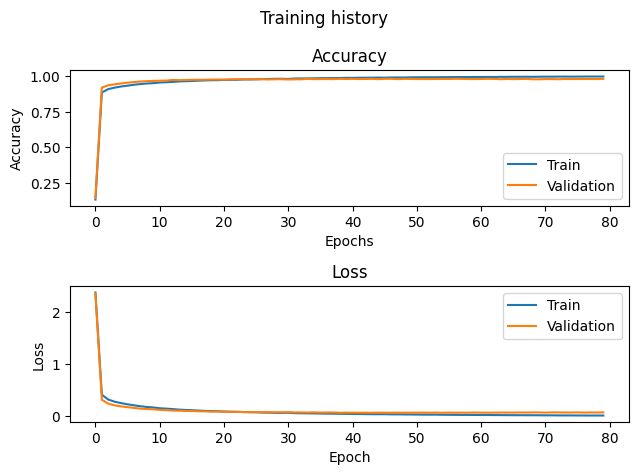

In [18]:
plot_nn_history(mlp_mnist)

In [19]:
# Save the model
mlp_mnist.save('mnist', 'models')

# Morphological augmentation

In [ ]:
import cv2

def erosion(image, kernel):
    return cv2.erode(image, kernel, iterations=1)

def osu_threshold(image):
    image_copy = image.copy()
    image_copy = (image_copy * 255).astype(np.uint8)
    # image_copy = cv2.GaussianBlur(image_copy, (3, 3), 0)

    _, img = cv2.threshold(image_copy, 0, 255, cv2.THRESH_BINARY)
        
    return img

def augment(img):
    a_img = osu_threshold(img)
    a_img = erosion(a_img, np.ones((2, 2)))
    return a_img


def make_morph_augmentation(images, labels, additional_augmented_part_size = 0.3):


    augmented_train_images = []

    to_index = int(len(images) * additional_augmented_part_size)

    for img in images[:to_index]:
        augmented_train_images.append(
            augment(img)
        )

    return np.array(augmented_train_images), labels[:to_index]

In [21]:
def shuffle_data(images, labels):
    indexes = np.arange(len(images))
    np.random.shuffle(indexes)

    return images[indexes], labels[indexes]

In [22]:
train_images_morph_augmented_only, train_labels_morph_augmented_only = make_morph_augmentation(train_images, train_labels)

train_images_augmented_morph = np.concatenate((train_images, train_images_morph_augmented_only))
train_labels_augmented_morph = np.concatenate((train_labels, train_labels_morph_augmented_only))

print(f'Augmented train images shape: {train_images_morph_augmented_only.shape}')
print(f'Train images shape after augmentation: {train_images_augmented_morph.shape}')


train_images_augmented_morph, train_labels_augmented_morph = shuffle_data(train_images_augmented_morph, train_labels_augmented_morph)

Augmented train images shape: (18000, 28, 28)
Train images shape after augmentation: (78000, 28, 28)


In [23]:
def plot2rows(first_row, second_row, images_displayed = 10):
    plt.figure(figsize=(16, 3))

    for i in range(images_displayed * 2):
        plt.subplot(2, images_displayed, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)

        if i < images_displayed:
            plt.imshow(first_row[i], cmap='gray')
        else:
            plt.imshow(second_row[i - images_displayed], cmap='gray')

    plt.suptitle(f'{images_displayed} original images and augmented images')

    plt.show()


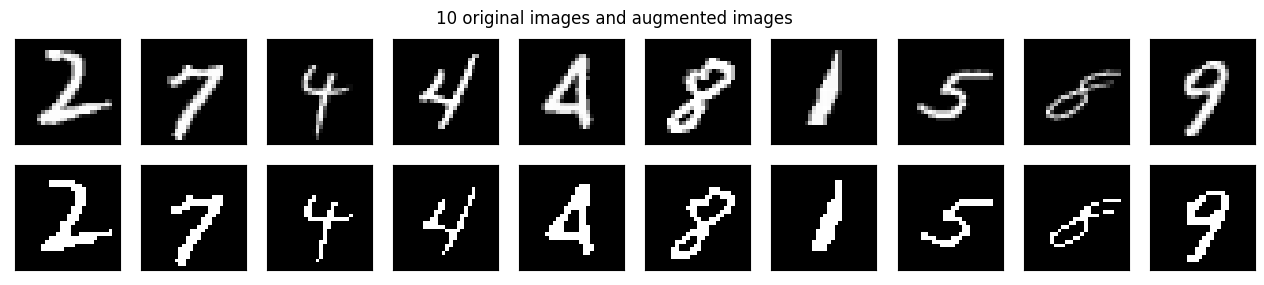

In [24]:
start_from = 410
images_displayed =10

plot2rows(
    train_images[start_from:start_from + images_displayed], 
    train_images_morph_augmented_only[start_from:start_from + images_displayed],
    images_displayed
)

In [25]:
mlp_mnist.reset()

In [26]:
mlp_mnist.fit(
    train_images_augmented_morph.reshape(-1, 784), 
    train_labels_augmented_morph, 
    learning_rate, 
    epochs, 
    batch_size,
    validation_split
)

Total iterations 124800
Iterations of each epoch 1560
Validation set size: 3900
Training set size: 74100
Evaluation set size: 74100
Validation set size: 3900
Epoch: 1/80 | loss 8.871060724621822 | accuracy 0.08053981106612686 | validation loss 9.105596873842908 | validation accuracy 0.0817948717948718
Evaluation set size: 74100
Validation set size: 3900
Epoch: 2/80 | loss 1.4609665220902461 | accuracy 0.8706072874493928 | validation loss 1.507329013825808 | validation accuracy 0.8715384615384615
Evaluation set size: 74100
Validation set size: 3900
Epoch: 3/80 | loss 1.0060512300825275 | accuracy 0.9086099865047234 | validation loss 1.100270440815024 | validation accuracy 0.9035897435897436
Evaluation set size: 74100
Validation set size: 3900
Epoch: 4/80 | loss 0.8764949299678577 | accuracy 0.9194197031039136 | validation loss 0.8555938078927834 | validation accuracy 0.9205128205128205
Evaluation set size: 74100
Validation set size: 3900
Epoch: 5/80 | loss 0.7168608283270983 | accuracy 

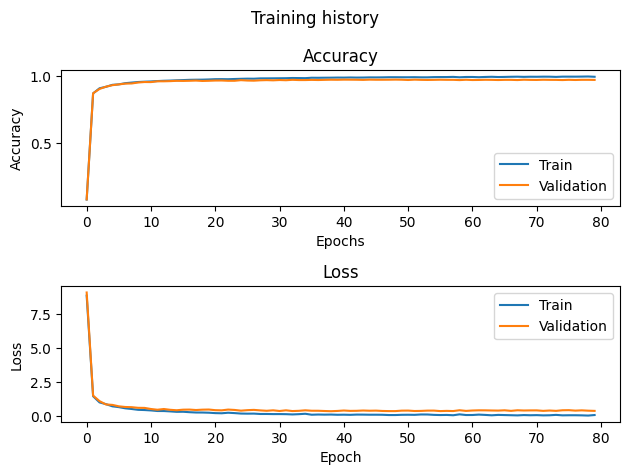

In [27]:
plot_nn_history(mlp_mnist)

In [28]:
mlp_mnist.save('mnist_morph_augmented', 'models')

# Datagen augmentation (rotation, shear, zoom etc.)

In [29]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


def make_datagen_augmentation(images, labels, augmented_images_percent = 0.3):
    datagen = ImageDataGenerator(rotation_range=20, # Rotating randomly the images up to 25°
                                width_shift_range=0.2, # Moving the images from left to right
                                height_shift_range=0.2, # Then from top to bottom
                                shear_range=0.10, 
                                zoom_range=0.1, # Zooming randomly up to 20%
                                zca_whitening=False,
                                horizontal_flip=False, 
                                vertical_flip=False,
                                fill_mode = 'nearest')

    augmented_images_to_index = int(len(images) * augmented_images_percent)

    datagen.fit(
        images.reshape(-1, 28, 28, 1)[:augmented_images_to_index]
    )

    augmented_images = datagen.flow(images.reshape(-1, 28, 28, 1), batch_size=augmented_images_to_index, shuffle=False).next()

    augmented_images = augmented_images.reshape(-1, 28, 28)
    augmented_labels = labels[:augmented_images_to_index]

    return augmented_images, augmented_labels

In [30]:
train_images_datagen_augmented_only, train_labels_datagen_augmented_only = make_datagen_augmentation(train_images, train_labels)

train_images_datagen_augmented = np.concatenate((train_images, train_images_datagen_augmented_only))
train_labels_datagen_augmented = np.concatenate((train_labels, train_labels_datagen_augmented_only))

print(f'Datage augmented train images shape: {train_images_datagen_augmented_only.shape}')
print(f'Train images shape after datage augmentation: {train_images_datagen_augmented.shape}')

train_images_datagen_augmented, train_labels_datagen_augmented = shuffle_data(train_images_datagen_augmented, train_labels_datagen_augmented)

Datage augmented train images shape: (18000, 28, 28)
Train images shape after datage augmentation: (78000, 28, 28)


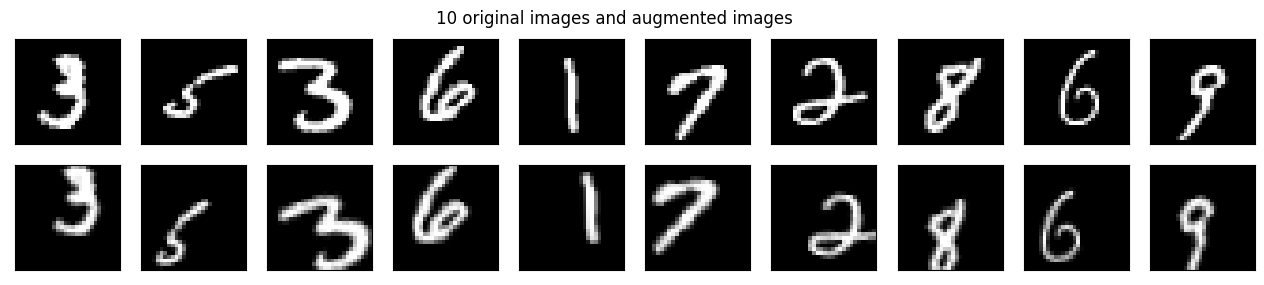

In [31]:
start_from = 10
images_displayed = 10

plot2rows(
    train_images[start_from:start_from + images_displayed], 
    train_images_datagen_augmented_only[start_from:start_from + images_displayed]
)


In [32]:
mlp_mnist.reset()

In [33]:
mlp_mnist.fit(
    train_images_datagen_augmented.reshape(-1, 784), 
    train_labels_datagen_augmented, 
    learning_rate, 
    epochs, 
    batch_size,
    validation_split
)

Total iterations 124800
Iterations of each epoch 1560
Validation set size: 3900
Training set size: 74100
Evaluation set size: 74100
Validation set size: 3900
Epoch: 1/80 | loss 2.410051672490728 | accuracy 0.08406207827260459 | validation loss 2.4037651501719495 | validation accuracy 0.08512820512820513
Evaluation set size: 74100
Validation set size: 3900
Epoch: 2/80 | loss 0.8953800871490242 | accuracy 0.7380161943319838 | validation loss 0.9130917540488135 | validation accuracy 0.7371794871794872
Evaluation set size: 74100
Validation set size: 3900
Epoch: 3/80 | loss 0.7317443969477044 | accuracy 0.7791632928475034 | validation loss 0.755209787175046 | validation accuracy 0.7776923076923077
Evaluation set size: 74100
Validation set size: 3900
Epoch: 4/80 | loss 0.6123115914587862 | accuracy 0.8142240215924427 | validation loss 0.6389780936325412 | validation accuracy 0.8094871794871795
Evaluation set size: 74100
Validation set size: 3900
Epoch: 5/80 | loss 0.5248394020341622 | accura

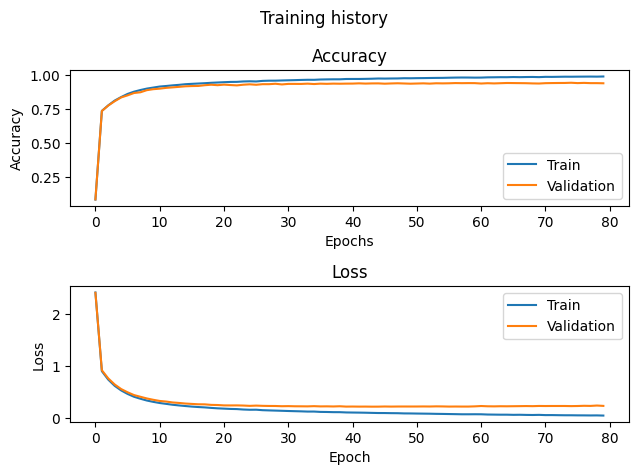

In [34]:
plot_nn_history(mlp_mnist)

In [35]:
mlp_mnist.save('mnist_datagen_augmented', 'models')

# Datagen + then Morph augmentation

In [36]:
train_images_datagen_augmented_morph_augmented_only, train_labels_datagen_augmented_morph_augmented_only = make_morph_augmentation(
    train_images_datagen_augmented, 
    train_labels_datagen_augmented
)

train_images_datagen_augmented_morph_augmented = np.concatenate((train_images_datagen_augmented, train_images_datagen_augmented_morph_augmented_only))
train_labels_datagen_augmented_morph_augmented = np.concatenate((train_labels_datagen_augmented, train_labels_datagen_augmented_morph_augmented_only))

print(f'Augmented train images shape: {train_images_datagen_augmented_morph_augmented_only.shape}')
print(f'Train images shape after augmentation: {train_images_datagen_augmented_morph_augmented.shape}')

train_images_datagen_augmented_morph_augmented, train_labels_datagen_augmented_morph_augmented = shuffle_data(
    train_images_datagen_augmented_morph_augmented, 
    train_labels_datagen_augmented_morph_augmented
)

Augmented train images shape: (23400, 28, 28)
Train images shape after augmentation: (101400, 28, 28)


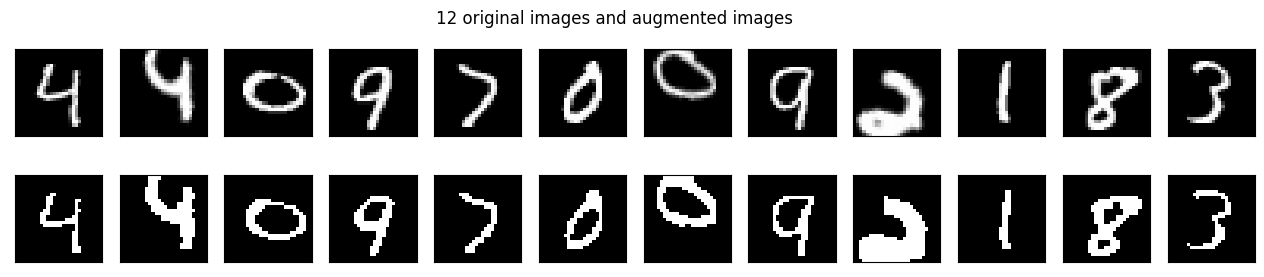

In [37]:
start_from = 410
images_displayed = 12

plot2rows(
    train_images_datagen_augmented[start_from:start_from + images_displayed], 
    train_images_datagen_augmented_morph_augmented_only[start_from:start_from + images_displayed],
    images_displayed
)

In [38]:
mlp_mnist.reset()

In [39]:
mlp_mnist.fit(
    train_images_datagen_augmented_morph_augmented.reshape(-1, 784), 
    train_labels_datagen_augmented_morph_augmented, 
    learning_rate, 
    epochs, 
    batch_size,
    validation_split
)

Total iterations 162240
Iterations of each epoch 2028
Validation set size: 5070
Training set size: 96330
Evaluation set size: 96330
Validation set size: 5070
Epoch: 1/80 | loss 8.799197151199076 | accuracy 0.11719090625973216 | validation loss 9.006229515139808 | validation accuracy 0.11222879684418145
Evaluation set size: 96330
Validation set size: 5070
Epoch: 2/80 | loss 2.5521550730330373 | accuracy 0.32161320460915604 | validation loss 2.633439881792248 | validation accuracy 0.31775147928994085
Evaluation set size: 96330
Validation set size: 5070
Epoch: 3/80 | loss 2.6526266256350204 | accuracy 0.39172635731340183 | validation loss 2.6546170631830686 | validation accuracy 0.3883629191321499
Evaluation set size: 96330
Validation set size: 5070
Epoch: 4/80 | loss 2.746678269808944 | accuracy 0.5169729056368733 | validation loss 2.8812217593375427 | validation accuracy 0.5122287968441814
Evaluation set size: 96330
Validation set size: 5070
Epoch: 5/80 | loss 2.1825675205195245 | accur

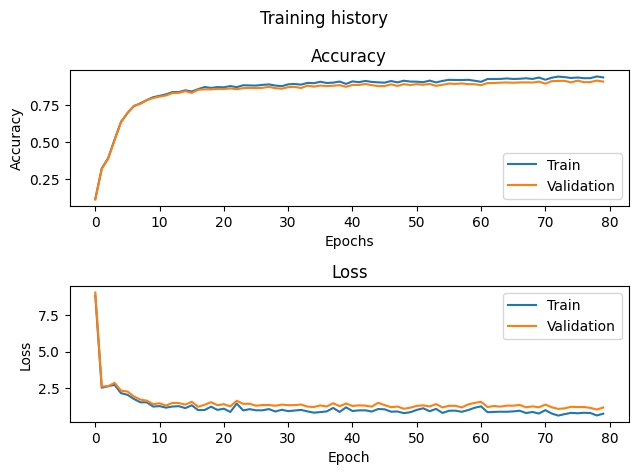

In [40]:
plot_nn_history(mlp_mnist)

In [41]:
mlp_mnist.save('mnist_datagen&morph_augmented', 'models')